In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
#from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn import metrics

In [14]:
df = pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/DATASET/PFE.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,30.218216,30.388994,29.952562,30.313093,23.628897,39322421
1,2016-01-05,30.531309,30.588236,30.294119,30.531309,23.798998,28777994
2,2016-01-06,30.104364,30.265656,29.810247,29.990513,23.377451,27242316
3,2016-01-07,29.563566,30.180265,29.544592,29.791271,23.222141,39223134
4,2016-01-08,29.933586,30.009487,29.335863,29.411764,22.926319,34840286


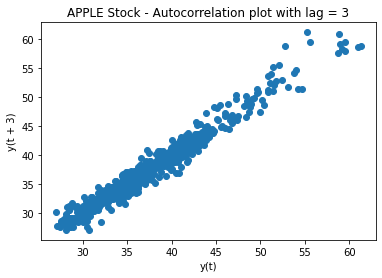

In [15]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.show()

In [16]:
int(len(df)*0.7)

1057

In [17]:
df.shape

(1510, 7)

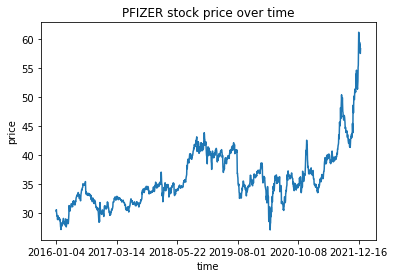

In [18]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1510, 300), df['Date'][0:1510:300])
plt.title("PFIZER stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [19]:
# divide the data into a training (70 % ) and test (30%) set.
#p=4, d=1, q=0
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


In [20]:
MAE_error = metrics.mean_absolute_error(test_data, model_predictions)
RMSE_error = np.sqrt(metrics.mean_squared_error(test_data, model_predictions))
MSE_error = metrics.mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))
print('Testing Root Mean Squared Error is {}'.format(RMSE_error))

Testing Mean Squared Error is 0.5618336423647983
Testing Mean Absolute Error is 0.5007345423737292
Testing Root Mean Squared Error is 0.7495556299333614


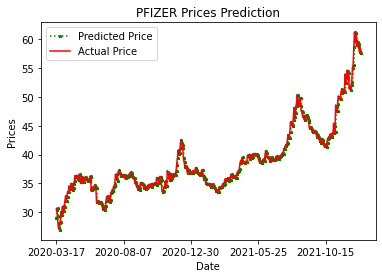

In [21]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='green', marker='*',markersize=3, linestyle='dotted',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('PFIZER Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1057,1510,100), df.Date[1057:1510:100])
plt.legend()
plt.show()

In [22]:
arr = np.array(model_predictions)
print(arr)

[28.95263779 30.31155316 30.65790141 29.2680557  27.3670161  26.90987092
 28.18417819 28.37186011 30.06692944 29.41692677 30.82127009 30.98419332
 30.24636566 30.91993637 31.93719255 32.87049298 31.95061814 32.6577199
 33.53505708 33.4751642  34.42847754 34.20282366 34.05111992 34.85556536
 34.39017074 33.79865181 34.23322017 34.86033958 35.4920389  36.325172
 36.04878758 36.10375163 36.32274706 35.80820414 35.63757413 36.44217329
 36.64085143 35.19383312 35.15099303 36.06101825 35.63592666 35.14878082
 35.83302338 35.90554073 36.13544451 35.74239828 35.70447299 35.34584928
 35.56184671 35.57271672 35.52470479 36.15375725 36.26890146 33.86389579
 34.10312232 34.24162505 34.33694471 34.10812796 34.66474812 34.41287004
 34.1086998  31.73010009 31.88959832 31.63571552 31.80172356 31.79841029
 31.58711682 31.68328988 31.42796809 31.12333678 30.5513339  30.63354431
 30.42362039 30.94120908 31.03287462 31.96657311 32.7094477  32.80553836
 32.29188864 31.98128025 31.7407582  32.07399633 33.33

In [23]:
df = pd.DataFrame(arr, columns =['Open'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Open
0,28.952638
1,30.311553
2,30.657901
3,29.268056
4,27.367016
...,...
448,59.587758
449,58.606235
450,59.207313
451,58.068329


In [24]:
df.to_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_PFE.csv",index=None)
df.head(5)

,Open
0,28.952638
1,30.311553
2,30.657901
3,29.268056
4,27.367016
